# Telecom X - Parte 1

### 1. Extracción

#### 1.1 Importa datos de la API

In [1]:
import requests
import pandas as pd
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response=requests.get(url)
data=response.json()
df_clientes=pd.DataFrame(data)
df_clientes

customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

#### 1.2 Normaliza campos con valores anidados

In [2]:
# dataframe de customerID y Churn
df_customers_churn = df_clientes[['customerID', 'Churn']]
# normalizando columna customer
df_customer_normalizado = pd.json_normalize(df_clientes['customer'])
#normalizando columna phone
df_phone_normalizado = pd.json_normalize(df_clientes['phone'])
#normalizando columna internet
df_internet_normalizado = pd.json_normalize(df_clientes['internet'])
#normalizando columna phoacount
df_account_normalizado = pd.json_normalize(df_clientes['account'])
# concatenar columnas de dos dataframes
df_clientes_concat = pd.concat([df_customers_churn,df_customer_normalizado,df_phone_normalizado,df_internet_normalizado,df_account_normalizado], axis=1)
df_clientes_concat

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0             Yes                No             DSL  ...          Yes   
1             Yes               Yes             DSL  ...           No   
2             Yes                No     Fiber optic  ...           No   
3             Yes                No     Fiber optic  ...          Yes   
4             Yes                No     Fiber optic  ...           No   
...           ...               ...             ...  ...          ...   
7262          Yes                No             DSL  ...           No   
7263          Yes               Yes     Fiber optic  ...           No   
7264          Yes                No             DSL  ...          Yes   
7265          Yes                No             DSL  ...           No   
7266           No  No phone service             DSL  ...          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0                 Yes      Mailed check           65.60          593.3  
1                  No      Mailed check           59.90          542.4  
2                 Yes  Electronic check           73.90         280.85  
3                 Yes  Electronic check           98.00        1237.85  
4                 Yes      Mailed check           83.90          267.4  
...               ...               ...             ...            ...  
7262               No      Mailed check           55.15          742.9  
7263              Yes  Electronic check           85.10         1873.7  
7264              Yes      Mailed check           50.30          92.75  
7265               No      Mailed check           67.85        4627.65  
7266               No  Electronic check           59.00         3707.6  

[7267 rows x 21 columns]

### 2. Transformación


#### 2.1 Conociendo el grupo de datos

In [3]:
# Muestra los tipos de datos de cada columna
df_clientes_concat.dtypes


customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

In [4]:
# Muestra los tipos de datos y si contienen o no valores nullos
df_clientes_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#### 2.2 Detección de valores nulos en el dataframe de clientes

In [5]:
# Verifica si hay algún valor nulo en el DataFrame método 1

any_missing = df_clientes_concat.isnull().any().any()
print(f"\n¿Hay algún valor nulo en el DataFrame? {any_missing}")


¿Hay algún valor nulo en el DataFrame? False


In [6]:
# Verifica si hay algún valor nulo en el DataFrame método 2

any_missing2=df_clientes_concat.isnull().values.sum()
any_missing2

np.int64(0)

#### 2.3 Detección de valores únicos

In [7]:
for col in df_clientes_concat.columns:
    print(f"Valores únicos de la columna {col}: {df_clientes_concat[col].nunique()}")
    if (df_clientes_concat[col].nunique() < 100 ):
        print(df_clientes_concat[col].unique())
        print('-' * 50)

Valores únicos de la columna customerID: 7267
Valores únicos de la columna Churn: 3
['No' 'Yes' '']
--------------------------------------------------
Valores únicos de la columna gender: 2
['Female' 'Male']
--------------------------------------------------
Valores únicos de la columna SeniorCitizen: 2
[0 1]
--------------------------------------------------
Valores únicos de la columna Partner: 2
['Yes' 'No']
--------------------------------------------------
Valores únicos de la columna Dependents: 2
['Yes' 'No']
--------------------------------------------------
Valores únicos de la columna tenure: 73
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------------------------------------
Valores únicos de la columna PhoneService: 2
['Yes' 'No']
--------------------------------------------------
Val

#### 2.4 Detección de filas duplicadas

In [8]:
# Verificando si hay líneas duplicadas
df_clientes_concat.duplicated().sum()

np.int64(0)

#### 2.5 Consultando valores vacíos

In [9]:
# Consultando valores vacíos
cantidad_vacíos=df_clientes_concat.apply(lambda x: x.astype(str).str.strip() == '').sum()
print('Columnas con valores vacíos')
cantidad_vacíos[cantidad_vacíos>0]

Columnas con valores vacíos


Churn            224
Charges.Total     11
dtype: int64

#### 2.6 Corrección de errores de formato

##### 2.6.1 Eliminando valores vacíos

In [10]:
# Eliminando valores vacíos de la columna 'Churn' quedan 7043 filas

df_clientes_concat=df_clientes_concat[df_clientes_concat['Churn'].str.strip() != '']
df_clientes_concat

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0             Yes                No             DSL  ...          Yes   
1             Yes               Yes             DSL  ...           No   
2             Yes                No     Fiber optic  ...           No   
3             Yes                No     Fiber optic  ...          Yes   
4             Yes                No     Fiber optic  ...           No   
...           ...               ...             ...  ...          ...   
7262          Yes                No             DSL  ...           No   
7263          Yes               Yes     Fiber optic  ...           No   
7264          Yes                No             DSL  ...          Yes   
7265          Yes                No             DSL  ...           No   
7266           No  No phone service             DSL  ...          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0                 Yes      Mailed check           65.60          593.3  
1                  No      Mailed check           59.90          542.4  
2                 Yes  Electronic check           73.90         280.85  
3                 Yes  Electronic check           98.00        1237.85  
4                 Yes      Mailed check           83.90          267.4  
...               ...               ...             ...            ...  
7262               No      Mailed check           55.15          742.9  
7263              Yes  Electronic check           85.10         1873.7  
7264              Yes      Mailed check           50.30          92.75  
7265               No      Mailed check           67.85        4627.65  
7266               No  Electronic check           59.00         3707.6  

[7043 rows x 21 columns]

##### 2.6.2 Convierte a formato numérico la columna Charges.Total

In [11]:
# Se convierte a formato numérico los valores de tipo string de la columna Charges.Total y los que no son
# numéricos se convierten a NaN

df_clientes_concat['Charges.Total'] = pd.to_numeric(df_clientes_concat['Charges.Total'], errors='coerce')


df_clientes_concat.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

C:\Users\csoli\AppData\Local\Temp\ipykernel_12712\2239318695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clientes_concat['Charges.Total'] = pd.to_numeric(df_clientes_concat['Charges.Total'], errors='coerce')


In [12]:
# Muestra la cantidad de valores convertidos a NaN de la columna Charges.Total

print(df_clientes_concat.isnull().sum())

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


##### 2.6.3 Se crea nueva columna Cuentas_Diarias

In [13]:
df_clientes_concat['Cuentas_Diarias']=df_clientes_concat['Charges.Monthly'] /30
print(df_clientes_concat[['Charges.Monthly','Cuentas_Diarias']])

      Charges.Monthly  Cuentas_Diarias
0               65.60         2.186667
1               59.90         1.996667
2               73.90         2.463333
3               98.00         3.266667
4               83.90         2.796667
...               ...              ...
7262            55.15         1.838333
7263            85.10         2.836667
7264            50.30         1.676667
7265            67.85         2.261667
7266            59.00         1.966667

[7043 rows x 2 columns]


C:\Users\csoli\AppData\Local\Temp\ipykernel_12712\1852670974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clientes_concat['Cuentas_Diarias']=df_clientes_concat['Charges.Monthly'] /30


### 3. Análisis Descriptivo

#### 3.1 Gráfico Churn versus Gender

In [14]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='gender',text_auto = True, color='Churn',barmode='group')

##### 3.2 Gráfico Churn versus SeniorCitzen

In [15]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='SeniorCitizen',text_auto = True, color='Churn',barmode='group')

#### 3.3 Gráfico Churn versus Partner

In [16]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='Partner',text_auto = True, color='Churn',barmode='group')

#### 3.4 Gráfico Churn versus Dependents

In [17]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='Dependents',text_auto = True, color='Churn',barmode='group')

#### 3.5 Gráfico Churn versus Tenure

In [18]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='tenure',text_auto = True, color='Churn',barmode='group')

#### 3.6 Gráfico Churn versus PhoneService

In [19]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='PhoneService',text_auto = True, color='Churn',barmode='group')

#### 3.7 Gráfico Churn versus MultipleLines

In [20]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='MultipleLines',text_auto = True, color='Churn',barmode='group')

#### 3.8 Gráfico Churn versus InternetService

In [21]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='InternetService',text_auto = True, color='Churn',barmode='group')

#### 3.9 Gráfico Churn versus OnlineSecurity

In [22]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='OnlineSecurity',text_auto = True, color='Churn',barmode='group')

#### 3.10 Gráfico Churn versus OnlineBackup

In [23]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='OnlineBackup',text_auto = True, color='Churn',barmode='group')

#### 3.11 Gráfico Churn versus DeviceProtection

In [24]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='DeviceProtection',text_auto = True, color='Churn',barmode='group')

#### 3.12 Gráfico Churn versus TechSupporS

In [25]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='TechSupport',text_auto = True, color='Churn',barmode='group')

#### 3.13 Gráfico Churn versus StreamingTV

In [26]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='StreamingTV',text_auto = True, color='Churn',barmode='group')

#### 3.14 Gráfico Churn versus StreamingMovies

In [27]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='StreamingMovies',text_auto = True, color='Churn',barmode='group')

#### 3.15 Gráfico Churn versus Contract

In [28]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='Contract',text_auto = True, color='Churn',barmode='group')

#### 3.16 Gráfico Churn versus PaperlessBilling

In [29]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='PaperlessBilling',text_auto = True, color='Churn',barmode='group')

#### 3.17 Gráfico Churn versus PaymentMethod

In [30]:
import plotly.express as px
px.histogram(df_clientes_concat, x ='PaymentMethod',text_auto = True, color='Churn',barmode='group')

#### 3.17 Gráfico Tenure vs Cargos Mensuales por Churn

In [31]:
import plotly.express as px
px.bar(df_clientes_concat, x ="tenure",y="Charges.Monthly",color='Churn',title='Tenure vs Cargos mensuales por Churn')

#### 3.18 Gráfico Tenure vs Cargos Mensuales por Churn

In [32]:
# Agrupa por tenure y churn

df_gruped=df_clientes_concat.groupby(['tenure','Churn']).size().unstack(fill_value=0)

# Calcular el porcentaje de churn por tenure

df_gruped['churn_rate']=(df_gruped.get('Yes',0)/df_gruped.sum(axis=1)) * 100

# Gráfico tenure vs churn_rate

fig=px.line(df_gruped.reset_index(),x='tenure',y='churn_rate',markers=True,title='Tasa de Churno (%) por Tenure')
fig.show()


#### 3.19. Análisis de descriptivo

In [33]:
df_clientes_concat.describe()

SeniorCitizen       tenure  Charges.Monthly  Charges.Total  \
count    7043.000000  7043.000000      7043.000000    7032.000000   
mean        0.162147    32.371149        64.761692    2283.300441   
std         0.368612    24.559481        30.090047    2266.771362   
min         0.000000     0.000000        18.250000      18.800000   
25%         0.000000     9.000000        35.500000     401.450000   
50%         0.000000    29.000000        70.350000    1397.475000   
75%         0.000000    55.000000        89.850000    3794.737500   
max         1.000000    72.000000       118.750000    8684.800000   

       Cuentas_Diarias  
count      7043.000000  
mean          2.158723  
std           1.003002  
min           0.608333  
25%           1.183333  
50%           2.345000  
75%           2.995000  
max           3.958333

### 4. Análisis de resultados

#### 4.1 Resultados

Introducción:

Después de haber realizado la importación de los datos de la información de clientes de la empresa Telecom X con el objetivo de analizar el comportamiento de evasión de sus clientes, y luego de haber aplicado procesos de consulta, exploración de datos, depuración y transformación a los mismos, se procedió a generar gráficos basados en histogramas que permitieron adquirir perspectivas más claras con respecto al comportamiento de evasión de los clientes considerando varios factores o variables inherentes al contrato de Telecom X con el cliente, tales como características del cliente, tipos de servicios contratados, tipos de contrato y formas de pago, que permitieron finalmente extraer conclusiones acerca de los factores más preponderantes que inciden en la evasión de clientes.

Identificación y manejo de inconsistencias:

Explorando los datos en busca de inconsistencias se describen a continuación los siguientes hallazgos:
- No se detectaron valores nulos
- No se detectaron filas duplicadas
- Se detectaron 224 filas con el campo Churn con valores vacíos
- La columna Charges.Total se que almacena valores numéricos tiene como tipo de dato object

Las transformaciones que fueron aplicadas de acuerdo a las inconsistencias detectadas fueron las siguientes:

- Se eliminaron las 224 filas que tenía el campo Churn con valores vacíos
- Se transforman a valores numéricos la columna Charges.Total y los 11 valores vacíos se convierten a valores NaN
- Se crea una nueva columna llamada Cuentas_Diarias derivada la columna Charges.Monthly

Análisis de perspectivas de forma global sin considerar la tenencia:

Desde la perspectiva del cliente:

- El género pareciera no establecer un factor diferenciante ni concluyente con respecto a la evasión del servicio, de forma que para ambos casos el comportamiento de evasión es similar.

- Las personas mayores de 65 años son las que muestran una mayor inclinación a la evasión del servicio comparado con personas menores, pero por el hecho de ser pocas las afiliaciones a Telecom X de estos clientes mayores, el efecto de la evasión no es tan determinante por el factor edad.

- Aunque no es significativa la diferencia entre los niveles de evasión del servicio debidos al estado de emparejamiento del cliente, si se puede observar claramente un mayor nivel de evasión del servicio para el caso de las personas que no tienen pareja.

- Para el caso de las personas que tienen personas dependientes, se puede observar claramente que la evasión es significativamente menor que la experimentada con clientes sin personas dependientes.

- Con respecto a la cantidad de meses de tenencia de servicios, la evasión es significativamente menor para el caso de los clientes que han tenido por bastantes meses, contrato con Telecom X, mostrando con ello un nivel de satisfacción lo suficientemente alto que reduce de forma muy importante para estos clientes, las evasiones de los servicios brindados por la empresa.

Desde la perspectiva del servicio telefónico:

- Se identifica que el mayor nivel de evasión se registra para el caso de los clientes con múltiples líneas telefónicas contratadas, disminuyendo la evasión para el caso de quienes tienen una sola línea y disminuyendo drásticamente en el caso de los clientes que no tienen activado el servicio telefónico.

Desde la perspectiva del Servicio de Internet:

- Para el caso de los clientes que tienen el servicio de internet activo, la mayor evasión se experimenta para aquellos que tienen conexión de fibra óptica, luego disminuye para el caso de clientes que cuenta con el servicio DSL, disminuyendo radicalmente el volumen de evasión para quienes no cuentan del todo con el servicio de internet.

- Por otro lado, para el caso de los clientes con servicio de internet activo, la cantidad de evasiones de servicio es marcadamente muy alta cuando no tienen contratado los servicios de OnlineSecurity, OnlineBackup, DeviceProtection, TechSuport, mientras que para el caso de los servicios de StreamingMovies y StreamingTV el nivel de evasión es similar en estos dos últimos casos lo cual sugiere que no son factores decisivos para la evasión de clientes.

Desde la perspectiva del contrato:

- Uno de los aspectos interesantes vinculados con la alta incidencia en la evasión de clientes es la temporalidad del tipo de contrato, siendo el caso del contrato Month-to-Month el que refleja la mayor cantidad de evasiones, afectando mínima el caso de los contratos del tipo One-Year y Two-Year.

Análisis de perspectivas de forma global considerando la tenencia:

Es importante mencionar que los aspectos descritos anteriormente que iniciden en menor o mayor medida en la evasión, no manifiestan un comportamiento constante a los largo del período de estudio de 73 meses.

Como lo muestran los gráficos 'Tenure vs Cargos mensuales por Churn' y 'Tasa de Churno (%) por Tenure', la evasión de clientes es muy alta al principio del período de estudio, pero va decayendo paulatinamente llegando a alcanzar un nivel muy bajo al alcanzarse los 73 meses, reflejando no solo una menor evasión conforme avanza el tiempo sino también una estabilización y fidelidad de los clientes a los servicios ofrecidos por Telecom X.

Conclusiones:

 Podría concluir según el análisis realizado que los factores que poseen una mayor preponderancia con respecto al problema de la evasión de clientes de la empresa Telecom X en términos globales, se ve incrementado en los siguientes casos:
 - Contratos donde el cliente cuenta con un servicio telefónico activo con múltiples líneas contratadas.
 - Servicio de internet basado en fibra óptica en general sin servicios activos de OnlineSecurity, OnlineBackup, DeviceProtection, TechSuport.
 - Cuando los clientes reciben factura electrónica y tienen como método de pago el cheque electrónico
 - Contratos firmados del tipo Month-to-Month.

Se observó que los factores mencionados anteriormente impactan más en la evasión de clientes al principio del período de estudio, decayendo de forma paulatina a lo largo del tiempo hasta alcanzar su nivel más bajo a los 73 meses.

Recomendaciones para reducir la evasión de clientes de Telecom X:

1. Estrategias sobre el tipo de contrato:
  
  Fomentar contratos de mayor plazo: Incentivar la migración de contratos Month-to-Month a planes anuales o bianuales mediante descuentos exclusivos, beneficios adicionales o precios especiales, ya que los datos muestran menor evasión en contratos de mayor duración.

2. Campañas personalizadas para clientes Month-to-Month:

  Identificar proactivamente a los clientes en este segmento y ofrecerles asesoría directa para resolver dudas, mejorar su experiencia y persuadirlos de la conveniencia de planes más estables.

3. Optimización del servicio telefónico:
  
  Revisión de ofertas para múltiples líneas: Rediseñar los paquetes con múltiples líneas, ofreciendo precios más competitivos o beneficios (minutos ilimitados entre líneas, descuentos familiares) para reducir la fuga de este segmento.

4. Segmentación de usuarios de múltiples líneas:

  Analizar sus patrones de uso y crear ofertas personalizadas (bundles de datos, llamadas internacionales, etc.) para aumentar el valor percibido.

5. Mejora del servicio de Internet y sus complementos
  
  - Enfoque en clientes de fibra óptica: Ya que presentan mayor evasión, es     prioritario revisar su experiencia. Acciones sugeridas:

    - Auditorías de calidad de servicio (velocidad real, estabilidad).

    - Atención proactiva para resolver fallos técnicos.

    - Programas de fidelización exclusivos para clientes de fibra óptica.

  - Promoción de servicios de valor agregado: Potenciar la adopción de OnlineSecurity, OnlineBackup, DeviceProtection y TechSupport. Ofrecer:

    - Paquetes combinados con descuento.

    - Periodos de prueba gratuitos.

    - Educación del cliente sobre la utilidad de estos servicios para incrementar su satisfacción y compromiso.

6. Optimización de métodos de pago
  - Revisión del pago por cheque electrónico: Identificar las razones detrás de la mayor evasión de este segmento:

     - ¿Es una barrera tecnológica?

    - ¿Un problema de usabilidad?

    - ¿Costos o comisiones asociadas?

    Con base en esto:

    - Incentivar el uso de métodos de pago más estables o automáticos (débito bancario, tarjetas).

    - Ofrecer beneficios por elegir pagos automáticos.

7. Retención temprana y gestión del ciclo de vida del cliente
  - Programas de bienvenida para nuevos clientes: Dado que la evasión es más alta al inicio de la relación, implementar:

    - Asesorías iniciales personalizadas.

    - Seguimientos proactivos en los primeros meses.

    - Beneficios especiales si permanecen 6 o 12 meses.

  - Alertas tempranas de riesgo de fuga: Usar modelos predictivos basados en las variables encontradas (tipo de contrato, servicio activo, edad del cliente, dependientes, etc.) para identificar clientes con alta probabilidad de fuga y activar intervenciones de retención.

8. Estrategias de fidelización general
  
  - Reconocimiento de antigüedad: Crear programas de recompensas por lealtad a largo plazo, reforzando la estabilidad mostrada después de los 73 meses.

  - Comunicación constante y personalizada: Enviar recomendaciones, promociones, consejos de uso, y encuestas de satisfacción, segmentadas según el perfil y uso del cliente.


# Telecom X - Parte 2

### 1. Depuración inicial de datos

In [34]:
# Para ignorar todas las advertencias
import warnings
warnings.filterwarnings("ignore")

#Elimina las columnas irrelevantes que no ayudan en la predicción de la cancelación
datos_limpios = df_clientes_concat.drop(columns='customerID',axis = 1)
datos_limpios

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       No  Female              0     Yes        Yes       9          Yes   
1       No    Male              0      No         No       9          Yes   
2      Yes    Male              0      No         No       4          Yes   
3      Yes    Male              1     Yes         No      13          Yes   
4      Yes  Female              1     Yes         No       3          Yes   
...    ...     ...            ...     ...        ...     ...          ...   
7262    No  Female              0      No         No      13          Yes   
7263   Yes    Male              0     Yes         No      22          Yes   
7264    No    Male              0      No         No       2          Yes   
7265    No    Male              0     Yes        Yes      67          Yes   
7266    No    Male              0     Yes        Yes      63           No   

         MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0                   No             DSL             No  ...               No   
1                  Yes             DSL             No  ...               No   
2                   No     Fiber optic             No  ...              Yes   
3                   No     Fiber optic             No  ...              Yes   
4                   No     Fiber optic             No  ...               No   
...                ...             ...            ...  ...              ...   
7262                No             DSL            Yes  ...               No   
7263               Yes     Fiber optic             No  ...               No   
7264                No             DSL             No  ...               No   
7265                No             DSL            Yes  ...              Yes   
7266  No phone service             DSL            Yes  ...              Yes   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0            Yes         Yes              No        One year              Yes   
1             No          No             Yes  Month-to-month               No   
2             No          No              No  Month-to-month              Yes   
3             No         Yes             Yes  Month-to-month              Yes   
4            Yes         Yes              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7262         Yes          No              No        One year               No   
7263          No          No             Yes  Month-to-month              Yes   
7264          No          No              No  Month-to-month              Yes   
7265         Yes          No             Yes        Two year               No   
7266          No         Yes             Yes        Two year               No   

         PaymentMethod Charges.Monthly  Charges.Total  Cuentas_Diarias  
0         Mailed check           65.60         593.30         2.186667  
1         Mailed check           59.90         542.40         1.996667  
2     Electronic check           73.90         280.85         2.463333  
3     Electronic check           98.00        1237.85         3.266667  
4         Mailed check           83.90         267.40         2.796667  
...                ...             ...            ...              ...  
7262      Mailed check           55.15         742.90         1.838333  
7263  Electronic check           85.10        1873.70         2.836667  
7264      Mailed check           50.30          92.75         1.676667  
7265      Mailed check           67.85        4627.65         2.261667  
7266  Electronic check           59.00        3707.60         1.966667  

[7043 rows x 21 columns]

In [35]:
# Elimina las  filas con NaN de la columna 'Charges.Total para que no afecten a modelos de machine learning
datos_limpios = datos_limpios.dropna(subset=['Charges.Total'])
datos_limpios

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       No  Female              0     Yes        Yes       9          Yes   
1       No    Male              0      No         No       9          Yes   
2      Yes    Male              0      No         No       4          Yes   
3      Yes    Male              1     Yes         No      13          Yes   
4      Yes  Female              1     Yes         No       3          Yes   
...    ...     ...            ...     ...        ...     ...          ...   
7262    No  Female              0      No         No      13          Yes   
7263   Yes    Male              0     Yes         No      22          Yes   
7264    No    Male              0      No         No       2          Yes   
7265    No    Male              0     Yes        Yes      67          Yes   
7266    No    Male              0     Yes        Yes      63           No   

         MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0                   No             DSL             No  ...               No   
1                  Yes             DSL             No  ...               No   
2                   No     Fiber optic             No  ...              Yes   
3                   No     Fiber optic             No  ...              Yes   
4                   No     Fiber optic             No  ...               No   
...                ...             ...            ...  ...              ...   
7262                No             DSL            Yes  ...               No   
7263               Yes     Fiber optic             No  ...               No   
7264                No             DSL             No  ...               No   
7265                No             DSL            Yes  ...              Yes   
7266  No phone service             DSL            Yes  ...              Yes   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0            Yes         Yes              No        One year              Yes   
1             No          No             Yes  Month-to-month               No   
2             No          No              No  Month-to-month              Yes   
3             No         Yes             Yes  Month-to-month              Yes   
4            Yes         Yes              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7262         Yes          No              No        One year               No   
7263          No          No             Yes  Month-to-month              Yes   
7264          No          No              No  Month-to-month              Yes   
7265         Yes          No             Yes        Two year               No   
7266          No         Yes             Yes        Two year               No   

         PaymentMethod Charges.Monthly  Charges.Total  Cuentas_Diarias  
0         Mailed check           65.60         593.30         2.186667  
1         Mailed check           59.90         542.40         1.996667  
2     Electronic check           73.90         280.85         2.463333  
3     Electronic check           98.00        1237.85         3.266667  
4         Mailed check           83.90         267.40         2.796667  
...                ...             ...            ...              ...  
7262      Mailed check           55.15         742.90         1.838333  
7263  Electronic check           85.10        1873.70         2.836667  
7264      Mailed check           50.30          92.75         1.676667  
7265      Mailed check           67.85        4627.65         2.261667  
7266  Electronic check           59.00        3707.60         1.966667  

[7032 rows x 21 columns]

In [36]:
# Verifica que se hayan eliminado los valores NaN por completo
nan_count = datos_limpios.isna().sum()
print(nan_count)

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Cuentas_Diarias     0
dtype: int64


In [37]:
# Reduce la **multicolinealidad** y **simplificar los datos** sin perder relevancia para el modelo predictivo.
# Agrupa "No internet service" como "No"

cols_to_fix = ['OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for col in cols_to_fix:
    datos_limpios[col] = datos_limpios[col].replace('No internet service', 'No')

In [38]:
# Verificación de la proporción de cancelación
datos_limpios['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

### 2. Análisis de correlación de variables

#### 2.1 Matríz de correlación de variables numéricas

In [39]:
#El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, 
#ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:
#**-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
#**0**: no hay relación lineal entre las variables.  
#**1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  

columnas_numericas = datos_limpios[['tenure', 'Charges.Monthly','Charges.Total','Cuentas_Diarias']]
corr = columnas_numericas.corr()
corr

tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias
tenure           1.000000         0.246862       0.825880         0.246862
Charges.Monthly  0.246862         1.000000       0.651065         1.000000
Charges.Total    0.825880         0.651065       1.000000         0.651065
Cuentas_Diarias  0.246862         1.000000       0.651065         1.000000

In [40]:
datos_limpios['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

#### 2.2 Gráfico de calor

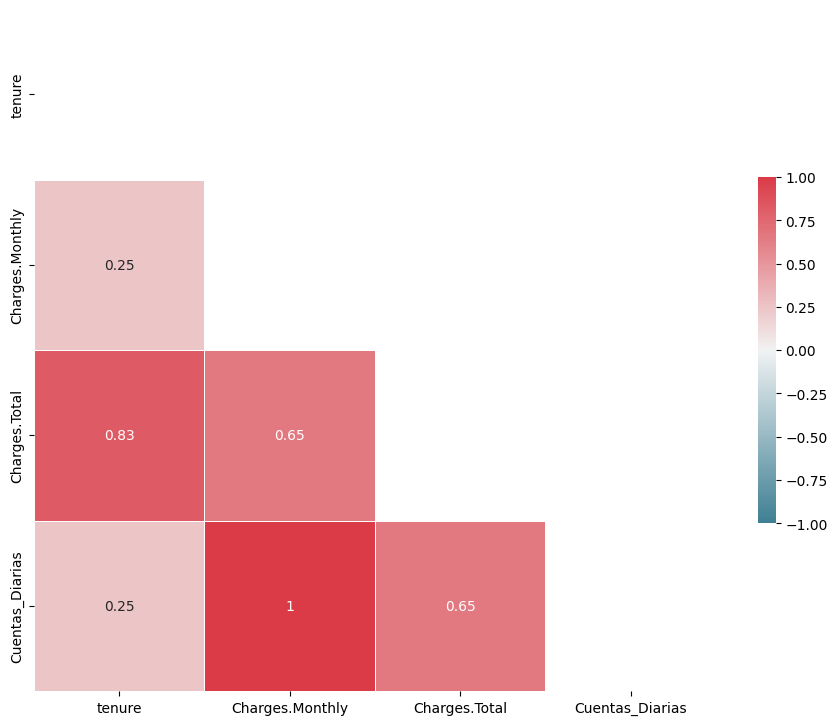

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()


#### 2.3 Análisis dirigido

In [42]:
import plotly.express as px
px.box(datos_limpios, x = 'tenure', color = 'Churn')

In [43]:
import plotly.express as px
px.box(datos_limpios, x = 'Charges.Total', color = 'Churn')

In [ ]:


datos_limpios.describe()

SeniorCitizen       tenure  Charges.Monthly  Charges.Total  \
count    7032.000000  7032.000000      7032.000000    7032.000000   
mean        0.162400    32.421786        64.798208    2283.300441   
std         0.368844    24.545260        30.085974    2266.771362   
min         0.000000     1.000000        18.250000      18.800000   
25%         0.000000     9.000000        35.587500     401.450000   
50%         0.000000    29.000000        70.350000    1397.475000   
75%         0.000000    55.000000        89.862500    3794.737500   
max         1.000000    72.000000       118.750000    8684.800000   

       Cuentas_Diarias  
count      7032.000000  
mean          2.159940  
std           1.002866  
min           0.608333  
25%           1.186250  
50%           2.345000  
75%           2.995417  
max           3.958333

# Interpretación conjunta (tenure vs charges.Total)

* Claramente, a mayor tenure hay mayor charges.Total, lo cual es lógico porque mientras más meses permanece un cliente, más paga acumulado.
* Los outliers son los clientes con gasto muy alto, que coinciden probablemente con los de mayor permanencia.
* La distribución muestra dos segmentos fuertes:
  * Clientes de corto plazo (≤ 9 meses, bajo gasto ≤ 400 USD).
  * Clientes fieles (≥ 4–5 años, gasto muy alto).

Las estadísticas indican que se refleja una distribución sesgada: muchos clientes duran poco y generan bajo ingreso, pero unos cuantos clientes de larga permanencia sostienen gran parte de los ingresos de la empresa.

### 3. Transformación de datos

#### 3.1 Separación de la variable respuesta de las variables explicativas

In [44]:
# Dataframe con variables explicativas
X = datos_limpios.drop('Churn', axis = 1)
X

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes        Yes       9          Yes   
1       Male              0      No         No       9          Yes   
2       Male              0      No         No       4          Yes   
3       Male              1     Yes         No      13          Yes   
4     Female              1     Yes         No       3          Yes   
...      ...            ...     ...        ...     ...          ...   
7262  Female              0      No         No      13          Yes   
7263    Male              0     Yes         No      22          Yes   
7264    Male              0      No         No       2          Yes   
7265    Male              0     Yes        Yes      67          Yes   
7266    Male              0     Yes        Yes      63           No   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0                   No             DSL             No          Yes   
1                  Yes             DSL             No           No   
2                   No     Fiber optic             No           No   
3                   No     Fiber optic             No          Yes   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7262                No             DSL            Yes           No   
7263               Yes     Fiber optic             No           No   
7264                No             DSL             No          Yes   
7265                No             DSL            Yes           No   
7266  No phone service             DSL            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod  Charges.Monthly  Charges.Total  \
0                 Yes      Mailed check            65.60         593.30   
1                  No      Mailed check            59.90         542.40   
2                 Yes  Electronic check            73.90         280.85   
3                 Yes  Electronic check            98.00        1237.85   
4                 Yes      Mailed check            83.90         267.40   
...               ...               ...              ...            ...   
7262               No      Mailed check            55.15         742.90   
7263              Yes  Electronic check            85.10        1873.70   
7264              Yes      Mailed check            50.30          92.75   
7265               No      Mailed check            67.85        4627.65   
7266               No  Electronic check            59.00        3707.60   

      Cuentas_Diarias  
0            2.186667  
1            1.996667  
2            2.463333  
3            3.266667  
4            2.796667  
...               ...  
7262         1.838333  
7263         2.836667  
7264         1.676667  
7265         2.261667  
7266         1.966667  

[7032 rows x 20 columns]

In [45]:
# Dataframe con variables respuesta
y = datos_limpios['Churn']
y

0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
7262     No
7263    Yes
7264     No
7265     No
7266     No
Name: Churn, Length: 7032, dtype: object

#### 3.2 Transformación de variables explicativas y de respuesta

##### 3.2.1 Transformación de variables explicativas

In [46]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

columnas = X.columns

one_hot = make_column_transformer((
          OneHotEncoder(drop = 'if_binary'),
          ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']),
          remainder = 'passthrough',
          sparse_threshold=0,
          force_int_remainder_cols=False)

In [47]:
X = one_hot.fit_transform(X)

In [48]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__gender_Male', 'onehotencoder__SeniorCitizen_1',
       'onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_Yes',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year',
       'onehotencoder__Contract_Two year',
       'onehotencoder__PaperlessBilling_Yes',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
   

In [49]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))

onehotencoder__gender_Male  onehotencoder__SeniorCitizen_1  \
0                            0.0                             0.0   
1                            1.0                             0.0   
2                            1.0                             0.0   
3                            1.0                             1.0   
4                            0.0                             1.0   
...                          ...                             ...   
7027                         0.0                             0.0   
7028                         1.0                             0.0   
7029                         1.0                             0.0   
7030                         1.0                             0.0   
7031                         1.0                             0.0   

      onehotencoder__Partner_Yes  onehotencoder__Dependents_Yes  \
0                            1.0                            1.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            1.0                            0.0   
4                            1.0                            0.0   
...                          ...                            ...   
7027                         0.0                            0.0   
7028                         1.0                            0.0   
7029                         0.0                            0.0   
7030                         1.0                            1.0   
7031                         1.0                            1.0   

      onehotencoder__PhoneService_Yes  onehotencoder__Dependents_Yes  \
0                                 1.0                            1.0   
1                                 1.0                            0.0   
2                                 1.0                            0.0   
3                                 1.0                            0.0   
4                                 1.0                            0.0   
...                               ...                            ...   
7027                              1.0                            0.0   
7028                              1.0                            0.0   
7029                              1.0                            0.0   
7030                              1.0                            1.0   
7031                              0.0                            1.0   

      onehotencoder__MultipleLines_No  \
0                                 1.0   
1                                 0.0   
2                                 1.0   
3                                 1.0   
4                                 1.0   
...                               ...   
7027                              1.0   
7028                              0.0   
7029                              1.0   
7030                              1.0   
7031                              0.0   

      onehotencoder__MultipleLines_No phone service  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
7027                                            0.0   
7028                                            0.0   
7029                                            0.0   
7030                                            0.0   
7031                                            1.0   

      onehotencoder__MultipleLines_Yes  onehotencoder__InternetService_DSL  \
0                                  0.0                                 1.0   
1                                  1.0                                 1.0   
2                                  0.0                                 0.0   
3                                  0.0               

##### 3.2.2 Transformación de variable de respuesta

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
label_encoder = LabelEncoder()

In [52]:
y = label_encoder.fit_transform(y)

In [53]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(7032,))

##### 3.2.3 Verificación de la proporción de cancelación (Churn)

In [54]:
# Análisis de representatividad del dataset: 
# Por tratarse de un dataset 'moderadamente desbalanceado (73%-26%)'
# lo cual puede sesgar el modelo. Por tratarse de un dataser de un tamaño pequeño a moderado,
# una proporción de datos de entrenamiento y prueba del 80-20 puede ser apropiado aplicando
# el uso del parámetro stratify=y en train_test_split.

df = pd.DataFrame(y, columns=['y'])
df['y'].value_counts(normalize=True)


y
0    0.734215
1    0.265785
Name: proportion, dtype: float64

### 4. Creación de modelos

#### 4.1 Dividiendo los datos en datos de entrenamiento (train) y datos de prueba (test)

In [55]:
# Datos de entrenamientoo X_train y y_train
# Datos de pruebas X_test y y_test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=5
)

#### 4.2 Normalizando los datos numéricos de las variables explicativas para el modelo KNN

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Normaliza los variables númericas de los datos de entrenamiento X_train
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

pd.DataFrame(X_train_normalizado)

0    1    2    3    4    5    6    7    8    9   ...   20   21   22  \
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  1.0  0.0  0.0   
1     1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
3     0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
4     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5620  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0   
5621  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.0  0.0   
5622  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  ...  1.0  1.0  1.0   
5623  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  1.0  0.0   
5624  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   

       23   24   25        26        27        28        29  
0     0.0  0.0  1.0  0.211268  0.363229  0.103548  0.363229  
1     0.0  0.0  1.0  0.535211  0.014948  0.089124  0.014948  
2     0.0  1.0  0.0  0.507042  0.716991  0.392396  0.716991  
3     0.0  1.0  0.0  0.211268  0.757848  0.172213  0.757848  
4     0.0  0.0  1.0  0.478873  0.944694  0.449486  0.944694  
...   ...  ...  ...       ...       ...       ...       ...  
5620  0.0  0.0  0.0  0.619718  0.627803  0.433539  0.627803  
5621  0.0  1.0  0.0  0.577465  0.371201  0.277285  0.371201  
5622  0.0  0.0  0.0  0.619718  0.015944  0.100115  0.015944  
5623  0.0  1.0  0.0  0.394366  0.475336  0.218480  0.475336  
5624  0.0  1.0  0.0  0.028169  0.509716  0.020932  0.509716  

[5625 rows x 30 columns]

In [57]:
# Normaliza los variables númericas de los datos de prueba X_test
X_test_normalizado = normalizacion.transform(X_test)
pd.DataFrame(X_test_normalizado)

0    1    2    3    4    5    6    7    8    9   ...   20   21   22  \
0     0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   
1     1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  1.0   
4     0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1402  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  1.0  0.0   
1403  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  0.0   
1404  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  ...  1.0  0.0  0.0   
1405  1.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  1.0   
1406  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   

       23   24   25        26        27        28        29  
0     0.0  0.0  1.0  0.436620  0.726956  0.332074  0.726956  
1     0.0  0.0  1.0  0.211268  0.015944  0.029645  0.015944  
2     0.0  0.0  1.0  0.084507  0.008969  0.014557  0.008969  
3     0.0  0.0  0.0  0.746479  0.256104  0.271279  0.256104  
4     1.0  0.0  0.0  0.211268  0.170404  0.061609  0.170404  
...   ...  ...  ...       ...       ...       ...       ...  
1402  0.0  0.0  1.0  0.971831  0.924265  0.890694  0.924265  
1403  0.0  0.0  1.0  0.323944  0.157947  0.093399  0.157947  
1404  0.0  0.0  1.0  1.000000  0.495765  0.552723  0.495765  
1405  0.0  0.0  0.0  0.915493  0.886398  0.811580  0.886398  
1406  1.0  0.0  0.0  0.915493  0.618336  0.600687  0.618336  

[1407 rows x 30 columns]

#### 4.3 Creación de modelo DecisionTreeClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Se generan resultados modificando parámetros al modelo de clasificación

modelo_arbol = DecisionTreeClassifier(max_depth = 3, random_state =5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [59]:
# Exactitud generada con datos de entrenamiento
print(f'Exactitud modelo_arbol con datos de entrenamiento: {modelo_arbol.score(X_train, y_train)}')

Exactitud modelo_arbol con datos de entrenamiento: 0.792


In [60]:
# Exactitud generada con datos de prueba
modelo_arbol.score(X_test, y_test)
print(f'Exactitud modelo_arbol con datos de prueba: {modelo_arbol.score(X_test, y_test)}')

Exactitud modelo_arbol con datos de prueba: 0.7882018479033405


In [61]:
# Matriz de previsión del modelo de árbol con datos de prueba
y_previsto_test_arbol=modelo_arbol.predict(X_test)
y_previsto_test_arbol

array([0, 0, 0, ..., 0, 0, 0], shape=(1407,))

In [62]:
# Genera matriz de confusión
from sklearn.metrics import confusion_matrix
matriz_confusion = confusion_matrix(y_test,y_previsto_test_arbol)
print(matriz_confusion)

[[960  73]
 [225 149]]


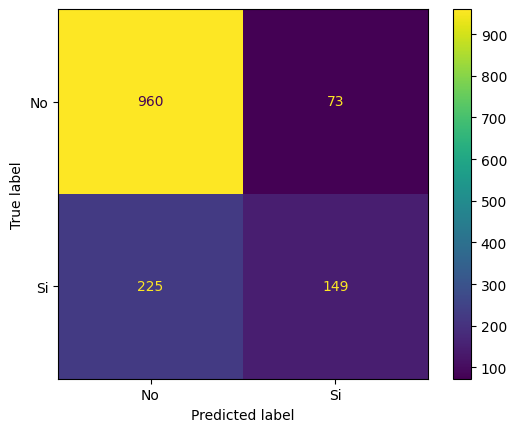

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['No','Si'])
visualizacion.plot();

In [64]:
# Matriz de confusión
# 0  VN  FP
# 1  FN  VP
#     0   1

# Exactitud:
#-----------
# Es la métrica más común y básica en problemas de clasificación. Se utiliza para medir la proporción de datos previstos
# correctamente por el modelo en relación al total de los datos. Esta métrica es útil cuando las clases de la variable
# objetivo están balanceadas, es decir, cuando hay una cantidad equilibrada de datos para cada clase y una importancia 
# equivalente de clasificación entre las categorías.
# Se calcula como: (VP+VN)/(VP+FP+FN+VN)
# Rango: 0.0 → 1.0
# Interpretación:
# 1.0 (100%) → Todas las predicciones fueron correctas.
# 0.5 (50%) → Rendimiento similar a adivinar al azar (si clases balanceadas).
# 0.0 (0%) → Todo fue clasificado incorrectamente.
# Limitación: Puede ser engañosa en datasets desbalanceados.

# Precisión(predichos):
#----------------------
# Mide la proporción de los datos clasificados como positivos que son realmente positivos, es decir, revela la capacidad del
# modelo en evitar la clasificación incorrecta de datos negativos como positivos. Se usa cuando el riesgo o costo de clasificar
# falsos positivos es alto, por ejemplo, en casos de selección de acciones en el mercado financiero, donde lo importante es
# seleccionar acciones que tengan gran probabilidad de retorno, reduciendo la cantidad de acciones malas (falsos positivos)
# incluso si otras buenas acciones no han sido detectadas por el modelo (falso negativo).
# Se calcula como:  VP/(VP+FP)
# Rango: 0.0 → 1.0
# Interpretación:
# 1.0 → Todos los positivos predichos realmente son positivos.
# 0.0 → Ningún positivo predicho es correcto.
# Útil cuando el costo de un falso positivo es alto.

# Sensibilidad (recall)(reales):
#-------------------------------
# Mide la proporción de los datos positivos reales que fueron correctamente identificados por el modelo, es decir, revela la capacidad del
# modelo en evitar la clasificación incorrecta de datos positivos como negativos. Se usa cuando el riesgo o costo de clasificar 
# falsos negativos es alto. Por ejemplo, en casos de diagnóstico de enfermedades graves, donde es fundamental detectar correctamente
# la presencia de la enfermedad.
# Se calcula como: VP/(VP+FN)
# Rango: 0.0 → 1.0
# Interpretación:
# 1.0 → Detecta todos los casos positivos.
# 0.0 → No detecta ningún positivo real.
# Útil cuando el costo de un falso negativo es alto (por ejemplo, diagnóstico médico).

#F1-Score:
#---------
# Proporciona un equilibrio entre el recall y la precisión, siendo útil cuando las clases de la variable objetivo están desbalanceadas,
# es decir, cuando hay una cantidad de datos muy diferente para cada clase. Además, es aplicable cuando el riesgo o costo de falsos positivos
# y de falsos negativos es alto simultáneamente. En casos de detección de tumores en pacientes, es necesario tener un equilibrio entre evitar
# errores en la detección de tumores cuando la persona realmente los tiene y evitar errores al informar que una persona tiene un tumor cuando 
# en realidad no lo tiene.
# Se calcula como: 2 * ((Precisión * Sensibilidad)/(Precisión + Sensibilidad))
# Rango: 0.0 → 1.0
# Interpretación:
# 1.0 → Balance perfecto entre precisión y sensibilidad.
# 0.0 → O la precisión o la sensibilidad son nulas.
# Útil cuando se busca equilibrio entre falsos positivos y falsos negativos.

# Especifidad(reales):
#---------------------
# Mide la proporción de los datos negativos reales que fueron correctamente identificados por el modelo. Responde a la pregunta: De todas
# las instancias negativas reales, ¿cuántas reconoció correctamente el modelo?
# Se calcula como: VN/(VN+FP)
# Rango: 0.0 → 1.0
# Interpretación:
# 1.0 → Detecta correctamente todos los negativos.
# 0.0 → Clasifica mal todos los negativos.
# Complementaria a la sensibilidad.

#-------------------------------------------------------------------------------------------------------------------
#       Métrica	           0.0 (Malo)	           0.5 (Medio)	                             1.0 (Excelente)
#-------------------------------------------------------------------------------------------------------------------
#Exactitud	          Todas mal	                Adivinar al azar (balanceado)	       Todas correctas
#Precisión	          Ningún positivo correcto	La mitad de los positivos correctos	   Todos los positivos correctos
#Sensibilidad	      No detecta positivos	    Detecta la mitad de los positivos      Detecta todos los positivos
#F1-score	          Sin balance	            Balance parcial	                       Balance perfecto P/R
#Especificidad	      No detecta negativos	    Detecta la mitad	                   Detecta todos los negativos

# Cálculo de las metricas del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'La exactitud (accuracy) del modelo es DecisionTreeClassifier: {accuracy_score(y_test,y_previsto_test_arbol)}')
print(f'La precisión del modelo es DecisionTreeClassifier: {precision_score(y_test,y_previsto_test_arbol)}')
print(f'La sensibilidad (Recall) del modelo es DecisionTreeClassifier: {recall_score(y_test,y_previsto_test_arbol)}')
print(f'El F1-score del modelo es DecisionTreeClassifier: {f1_score(y_test,y_previsto_test_arbol)}')
print(f'La especifidad del modelo es DecisionTreeClassifier: {recall_score(y_test,y_previsto_test_arbol,pos_label=0)}')


La exactitud (accuracy) del modelo es DecisionTreeClassifier: 0.7882018479033405
La precisión del modelo es DecisionTreeClassifier: 0.6711711711711712
La sensibilidad (Recall) del modelo es DecisionTreeClassifier: 0.3983957219251337
El F1-score del modelo es DecisionTreeClassifier: 0.5
La especifidad del modelo es DecisionTreeClassifier: 0.9293320425943853


In [65]:

# Obtener importancias de las variables para el modelo de árbol
importances = modelo_arbol.feature_importances_

# Usar for para recorrer cada variable
for i in range(X.shape[1]):
    print(f"Variable {i+1}: importancia = {importances[i]*100:.4f}")

Variable 1: importancia = 0.0000
Variable 2: importancia = 0.0000
Variable 3: importancia = 0.0000
Variable 4: importancia = 0.0000
Variable 5: importancia = 0.0000
Variable 6: importancia = 0.0000
Variable 7: importancia = 0.0000
Variable 8: importancia = 0.0000
Variable 9: importancia = 0.0000
Variable 10: importancia = 0.0000
Variable 11: importancia = 16.5789
Variable 12: importancia = 0.0000
Variable 13: importancia = 0.0000
Variable 14: importancia = 0.0000
Variable 15: importancia = 0.0000
Variable 16: importancia = 0.0000
Variable 17: importancia = 0.0000
Variable 18: importancia = 0.0000
Variable 19: importancia = 62.3192
Variable 20: importancia = 0.0000
Variable 21: importancia = 1.4085
Variable 22: importancia = 0.0000
Variable 23: importancia = 0.0000
Variable 24: importancia = 0.0000
Variable 25: importancia = 0.0000
Variable 26: importancia = 0.0000
Variable 27: importancia = 17.7230
Variable 28: importancia = 1.9704
Variable 29: importancia = 0.0000
Variable 30: importa

#### 4.4 Creación de modelo KNN

In [66]:
#El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base 
#de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la 
#decisión de clasificación.

#Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la 
#escala de las variables, y por eso es necesario realizar una transformación en los 
#datos antes de utilizar este método.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

In [67]:
# Exactitud generada con datos de entrenamiento
print(f'Exactitud Knn con datos de entrenamiento: {knn.score(X_train_normalizado, y_train)}')

Exactitud Knn con datos de entrenamiento: 0.8291555555555555


In [68]:
# Exactitud generada con datos de prueba
print(f'Exactitud Knn con datos de entrenamiento: {knn.score(X_test_normalizado, y_test)}')

Exactitud Knn con datos de entrenamiento: 0.7611940298507462


In [69]:
# Genera matriz de previsión del modelo de árbolknn
y_previsto_test_knn=knn.predict(X_test_normalizado)
y_previsto_test_knn

array([1, 0, 0, ..., 0, 0, 0], shape=(1407,))

In [70]:
# Genera matriz de confusión
from sklearn.metrics import confusion_matrix
matriz_confusion = confusion_matrix(y_test,y_previsto_test_knn)
print(matriz_confusion)

[[870 163]
 [173 201]]


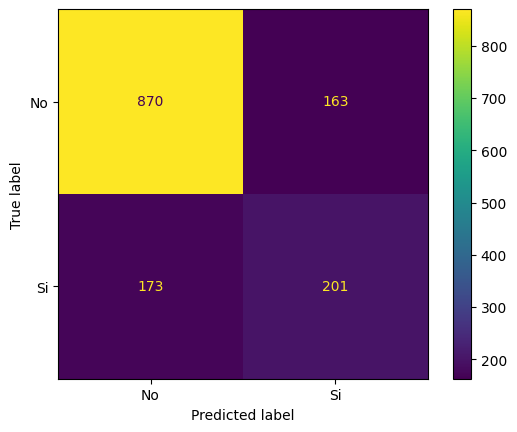

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['No','Si'])
visualizacion.plot();

In [72]:
# Cálculo de las metricas del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'La exactitud (accuracy) del modelo knn es: {accuracy_score(y_test,y_previsto_test_knn)}')
print(f'La precisión del modelo knn es: {precision_score(y_test,y_previsto_test_knn,zero_division=1)}')
print(f'La sensibilidad (Recall) del modelo knn es: {recall_score(y_test,y_previsto_test_knn)}')
print(f'El F1-score del modelo knn es: {f1_score(y_test,y_previsto_test_knn)}')
print(f'La especifidad del modelo knn es: {recall_score(y_test,y_previsto_test_knn,pos_label=0)}')


La exactitud (accuracy) del modelo knn es: 0.7611940298507462
La precisión del modelo knn es: 0.5521978021978022
La sensibilidad (Recall) del modelo knn es: 0.5374331550802139
El F1-score del modelo knn es: 0.5447154471544715
La especifidad del modelo knn es: 0.8422071636011617


In [73]:
# Qué hace este código: Obtiene el valor relativo de la importancia de las variables para el modelo KNN
#1. Calcula la precisión base del KNN en tus datos de prueba.
#2. Permuta aleatoriamente cada columna varias veces (n_repeats=10) y mide cómo cambia la precisión.
#3. La caída promedio de precisión se toma como la importancia de la variable.
#4. Ordena las variables de mayor a menor importancia y las despliega.

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Evaluación de importancia por permutación
result = permutation_importance(knn, X_test_normalizado, y_test, n_repeats=10, random_state=42, scoring='accuracy')
result
pd.DataFrame({
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)


Importance
26    0.011087
18    0.008458
19    0.008173
12    0.006752
17    0.004122
21    0.004051
0     0.003980
11    0.002772
20    0.002630
13    0.001635
14    0.001137
15    0.000284
25    0.000213
5     0.000142
3     0.000142
8     0.000142
1    -0.000071
6    -0.000426
16   -0.000498
4    -0.000640
7    -0.000640
28   -0.001564
2    -0.001777
27   -0.002772
29   -0.002772
23   -0.003127
9    -0.003340
22   -0.003909
10   -0.004762
24   -0.007249

### 5. Comparación de modelos

#### 5.1 ¿Cual modelo tuvo el mejor desempeño basado en las métricas generadas a partir de las matrices de confusión?

1. Resumen de métricas

Métrica       |KNN            |Arbol       |Mejor
--------------|---------------|------------|------------
Exactitud     |0.761          |0.788       |Árbol mejor
Precisión     |0.552          |0.671       |Árbol mejor (menos falsos positivos)
Sensibilidad  |0.537          |0.398       |KNN mejor (detecta más verdaderos positivos)
F1-score      |0.545          |0.500       |KNN mejor (balance entre precisión y recall)
Especificidad |0.842          |0.929       |Árbol mejor (detecta más verdaderos negativos)

2. Interpretación

   DecisionTreeClassifier:

* Tiene mayor exactitud y precisión, lo que significa que en general clasifica mejor y comete menos   falsos positivos.
* Su especificidad es muy alta (0.93), lo que indica que distingue muy bien los casos negativos.
Sin embargo, su sensibilidad es baja (0.398), lo que implica que está dejando escapar bastantes positivos reales (alto número de falsos negativos).

   KNN:

* Mejor en recall (0.537) y F1-score (0.545), lo que significa que detecta más casos positivos y tiene un mejor equilibrio entre precisión y sensibilidad.
* Pero su exactitud y precisión global son más bajas que las del árbol.

3. Conclusión

* Si tu problema prioriza evitar falsos negativos (ejemplo: detección de fraudes, enfermedades, riesgos), el KNN es más adecuado.

* Si en cambio tu problema prioriza minimizar falsos positivos o tener mayor exactitud general, el DecisionTreeClassifier es más fuerte.

#### 5.2 ¿Algún modelo presentó overfitting o underfitting? 

In [74]:
# ===== ENTRENAR LOS MODELOS =====
knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)

modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

# ===== FUNCIÓN PARA CALCULAR MÉTRICAS =====
def calcular_metricas(modelo, X, y):
    y_pred = modelo.predict(X)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)  # Sensibilidad
    f1 = f1_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    espec = tn / (tn + fp)
    return acc, prec, rec, f1, espec

# ===== CALCULAR MÉTRICAS =====
metricas_knn_train = calcular_metricas(knn, X_train, y_train)
metricas_knn_test  = calcular_metricas(knn, X_test, y_test)

metricas_modelo_arbol_train = calcular_metricas(modelo_arbol, X_train, y_train)
metricas_modelo_arbol_test  = calcular_metricas(modelo_arbol, X_test, y_test)

# ===== MOSTRAR RESULTADOS =====
import pandas as pd

df = pd.DataFrame({
    'Métrica': ['Exactitud', 'Precisión', 'Sensibilidad', 'F1-score', 'Especificidad'],
    'KNN Entrenamiento': metricas_knn_train,
    'KNN Prueba': metricas_knn_test,
    'modelo_arbol Entrenamiento': metricas_modelo_arbol_train,
    'modelo_arbol Prueba': metricas_modelo_arbol_test
})

#print(df)

# ===== DETECCIÓN DE OVERFITTING/UNDERFITTING =====
def diagnostico(train_acc, test_acc):
    if train_acc - test_acc > 0.10:  # diferencia mayor al 10%
        return "Overfitting probable"
    elif train_acc < 0.80 and abs(train_acc - test_acc) < 0.05:
        return "Underfitting probable"
    else:
        return "Balanceado"

print("\n------------")
print("Diagnóstico:")
print("------------")
print("Modelo de árbol:", diagnostico(metricas_modelo_arbol_train[0], metricas_modelo_arbol_test[0]))
print("KNN            :", diagnostico(metricas_knn_train[0], metricas_knn_test[0]))



------------
Diagnóstico:
------------
Modelo de árbol: Overfitting probable
KNN            : Underfitting probable


#### 5.3 Descripción del nivel de importancia de las variables

* Importancia de las variables usando feature_importances_ interno para el caso del modelo de árbol

Variable                                                    |Importancia %
------------------------------------------------------------|-------------
01'onehotencoder__gender_Male'  				            |2.1248
02'onehotencoder__SeniorCitizen_1' 				            |1.9024 
03'onehotencoder__Partner_Yes' 				                |1.8629
04'onehotencoder__Dependents_Yes'				            |0.7280
05'onehotencoder__PhoneService_Yes'				            |0.1846
06'onehotencoder__Dependents_Yes'				            |1.6172
07'onehotencoder__MultipleLines_No'				            |0.6281
08'onehotencoder__MultipleLines_No phone service'		    |0.3339
09'onehotencoder__MultipleLines_Yes'				        |1.1252
10'onehotencoder__InternetService_DSL' 			            |0.1095
11'onehotencoder__InternetService_Fiber optic' 		        |4.5687 
12'onehotencoder__InternetService_No'				        |0.6417
13'onehotencoder__OnlineSecurity_Yes'				        |1.6725
14'onehotencoder__OnlineBackup_Yes' 				        |1.1657
15'onehotencoder__DeviceProtection_Yes' 			        |1.3045
16'onehotencoder__TechSupport_Yes' 				            |2.0285
17'onehotencoder__StreamingTV_Yes' 				            |0.6641
18'onehotencoder__StreamingMovies_Yes' 			            |0.7664     
19'onehotencoder__Contract_Month-to-month'      	        |17.0941  
20'onehotencoder__Contract_One year'      			        |0.3864
21'onehotencoder__Contract_Two year' 				        |0.0000
22'onehotencoder__PaperlessBilling_Yes' 			        |2.2679
23'onehotencoder__PaymentMethod_Bank transfer (automatic)'  |1.0952
24'onehotencoder__PaymentMethod_Credit card (automatic)' 	|0.9771
25'onehotencoder__PaymentMethod_Electronic check' 	   	    |1.6093    
26'onehotencoder__PaymentMethod_Mailed check' 			    |1.0770
27'remainder__tenure' 					                    |12.1885 
28'remainder__Charges.Monthly' 			  	                |8.7637
29'remainder__Charges.Total' 					            |18.3041    
30'remainder__Cuentas_Diarias' 				                |12.8081

* Importancia de las variables identificado usando permutación para el caso del KNN (descendente por importancia)

Variable                                                    |Importancia
------------------------------------------------------------|------------
27'remainder__tenure' 					                    |0.011087
19'onehotencoder__Contract_Month-to-month'      	        |0.008458
20'onehotencoder__Contract_One year'      			        |0.008173
13'onehotencoder__OnlineSecurity_Yes'				        |0.006752
18'onehotencoder__StreamingMovies_Yes' 			            |0.004122
22'onehotencoder__PaperlessBilling_Yes' 			        |0.004051
01,'onehotencoder__gender_Male'  				            |0.003980
12'onehotencoder__InternetService_No'				        |0.002772
21'onehotencoder__Contract_Two year' 				        |0.002630
14'onehotencoder__OnlineBackup_Yes' 				        |0.001635
15'onehotencoder__DeviceProtection_Yes' 			        |0.001137
16'onehotencoder__TechSupport_Yes' 				            |0.000284
26'onehotencoder__PaymentMethod_Mailed check' 			    |0.000213
04'onehotencoder__Dependents_Yes'				            |0.000142
06'onehotencoder__Dependents_Yes'				            |0.000142
09'onehotencoder__MultipleLines_Yes'				        |0.000142
25'onehotencoder__PaymentMethod_Electronic check' 	   	    |-0.007249
11'onehotencoder__InternetService_Fiber optic' 		        |-0.004762
23'onehotencoder__PaymentMethod_Bank transfer (automatic)'  |-0.003909
10'onehotencoder__InternetService_DSL' 			            |-0.003340
24'onehotencoder__PaymentMethod_Credit card (automatic)' 	|-0.003127
28'remainder__Charges,Monthly' 			  	                |-0.002772
30'remainder__Cuentas_Diarias' 				                |-0.002772
03,'onehotencoder__Partner_Yes' 				            |-0.001777
29'remainder__Charges,Total' 					            |-0.001564
05'onehotencoder__PhoneService_Yes'				            |-0.000640
08'onehotencoder__MultipleLines_No phone service'		    |-0.000640
17'onehotencoder__StreamingTV_Yes' 				            |-0.000498
07'onehotencoder__MultipleLines_No'				            |-0.000426
02,'onehotencoder__SeniorCitizen_1' 				        |-0.000071


### 6. Conclusiones

#### 6.1 Análisis de la importancia de las variables según modelo de árbol

Para el caso del modelo de árbol y con con base en los valores de feature_importances_, los campos que más incidencia tienen en la predicción de la clase son los que tienen los valores más altos tales como:

* Charges.Total
* Contract
* Cuentas_Diarias	     
* tenure	             
* Charges.Monthly	     
 
De importancia moderada:

* InternetService
* PaperlessBilling
* gender
* TechSupport
* SeniorCitizen
* Partner

De importancia baja:

* DeviceProtection
* OnlineBackup
* StreamingMovies
* Contract

Conclusión:

El modelo se apoya fuertemente en:
* Variables numéricas de facturación y permanencia (Charges.Total, Cuentas_Diarias, tenure, Charges.Monthly).
* Variable tipo de contrato (especialmente Contract_Month-to-month).
Estas son las que más determinan la predicción de la clase, mientras que las demás solo afinan la decisión.



























#### 6.2 Análisis de la impportancia de las variables según el modelo KNN

Para el caso del modelo KNN y con con base en los valores importancia por permutación, los campos que más incidencia tienen en la predicción de la clase son los que tienen los valores más altos tales como:

* tenure
* Contract
* OnlineSecurity
* StreamingMovies
* PaperlessBilling
* gender

De importancia moderada:

* InternetService
* OnlineBackup
* DeviceProtection
* TechSupport

Baja o nula incidencia

* PaymentMethod
* InternetService
* Charges.Monthly
* Cuentas_Diarias
* Charges.Total
* SeniorCitizen
* Partner
* MultipleLines

Conclusión:
En este modelo KNN, las variables que más determinan la predicción son:
* Tenure (antigüedad del cliente)
* Tipo de contrato (especialmente mes a mes y un año)
* Servicios de seguridad en línea (OnlineSecurity, StreamingMovies)
* Facturación sin papel (PaperlessBilling)
* Género del cliente

Es interesante mencionar que las variables que en el árbol eran muy fuertes (como Charges.Total o Cuentas_Diarias) aquí tienen poca o incluso negativa importancia, lo que refleja que KNN y los árboles no necesariamente se apoyan en las mismas variables para clasificar.

























#### 6.3 Estrategia para evitar el abandono de clientes basada en el modelo de árbol

1. Variables de facturación (peso más alto en el árbol)
    * Charges.Total / Charges.Monthly / Cuentas_Diarias
        * Riesgo: cargos altos o acumulados → mayor propensión al abandono.
        * Acciones:
            * Diseñar paquetes escalonados: que el cliente pueda ajustar su plan según su capacidad de pago.
            * Implementar alertas preventivas de facturación (ejemplo: aviso antes de que el cargo supere cierto umbral).
            * Ofrecer descuentos temporales o bonos de lealtad a clientes con facturas elevadas.

2. Tipo de contrato
    * Contract_Month-to-month = la modalidad más riesgosa según el modelo.
    * Contract_One year y Two year = mucho menor incidencia en abandono.
        * Acciones:
            * Incentivar la migración de clientes de mes a mes hacia planes anuales o bianuales con beneficios adicionales (descuentos, servicios premium, más velocidad).
            * Establecer cláusulas flexibles que permitan cambios de plan sin penalidad, reduciendo el miedo a contratos largos.

3. Antigüedad del cliente (tenure)
    * Clientes con baja antigüedad son más propensos a irse.
        * Acciones:
            * Crear un programa de onboarding fuerte en los primeros meses (soporte intensivo, tutoriales, llamadas de seguimiento).
            * Implementar un plan de retención a 90 días: contacto proactivo para asegurarse de que el cliente perciba valor.
            * Reconocimiento a la lealtad: premios a clientes que superen 1 o 2 años de permanencia.

4. Servicios adicionales (OnlineSecurity, TechSupport, Streaming)
    * Según el árbol y el KNN, estos servicios aportan diferenciación, aunque con menor peso.
        * Acciones:
            * Promocionar servicios de valor agregado (ejemplo: seguridad online incluida gratis los primeros 6 meses).
            * Ofrecer soporte técnico inmediato como ventaja competitiva.
            * Paquetes con streaming y protección → aumentan la percepción de valor y reducen intención de abandono.

5. Facturación y forma de pago
    * PaperlessBilling_Yes tiene incidencia → algunos clientes pueden percibirlo como falta de control.
    * Métodos de pago electrónicos tienen impacto desigual.
        * Acciones:
            * Ofrecer múltiples formas de pago y recordatorios personalizados.
            * Incentivar pagos automáticos con bonos de fidelidad (ejemplo: 1 mes de descuento por 12 meses en débito automático).

6. Estrategia global contra el abandono
    1. Segmentar clientes en riesgo (alto cargo mensual + contrato mes a mes + baja antigüedad).
    2. Acciones preventivas personalizadas:
        * Para clientes de alto cargo: flexibilidad de plan.
        * Para contratos mes a mes: ofertas para migrar a anual.
        * Para nuevos clientes: acompañamiento intensivo en los primeros 3-6 meses.
    3. Incentivos a la fidelidad: descuentos, servicios premium, puntos acumulables.
    4. Monitorización en tiempo real: usar el mismo modelo para identificar semanalmente clientes con alta probabilidad de churn y activar campañas de retención inmediatas.

En resumen:

El modelo da las palancas clave (facturación, tipo de contrato, antigüedad). La estrategia es intervenir en esas palancas antes de que el cliente tome la decisión de irse.










#### 6.4 Estrategia para evitar el abandono de clientes basada en el modelo KNN

1. Antigüedad del cliente (tenure)
   * Riesgo: clientes con baja antigüedad (recién adquiridos) son más propensos a irse.
   * Acciones:
        * Onboarding proactivo: llamadas o mensajes de bienvenida en los primeros 30 días.
        * Plan de retención a 90 días: descuentos temporales o upgrades gratuitos en los primeros 3 meses.
        * Reconocimiento a la fidelidad: beneficios visibles a partir del primer año (ejemplo: “Cliente Oro” con descuentos especiales).

2. Tipo de contrato (Contract)
    * Mes a mes: mayor riesgo de abandono.
    * Un año: menor riesgo, pero aún con incidencia en churn.
    * Acciones:
        * Incentivar el paso de contratos mes a mes → anual o bianual con:
            * descuentos por lealtad,
            * servicios premium gratis por 6 meses (ejemplo: más velocidad de internet, más canales).
        * Dar flexibilidad en planes anuales: cambios de paquete sin penalización, lo que reduce la percepción de “atadura”.

3. Servicios de seguridad y entretenimiento
    * OnlineSecurity_Yes y StreamingMovies_Yes resultan relevantes en KNN.
    * Acciones:
        * Ofrecer seguridad online gratuita los primeros meses para aumentar el valor percibido.
        * Bundles atractivos que incluyan streaming (TV, películas, apps de terceros) para enganchar al cliente y hacer más costoso emocionalmente el abandono.

4. Facturación y pago (PaperlessBilling_Yes)
    * Los clientes con facturación sin papel pueden sentirse desconectados del control de pagos.
    * Acciones:
        * Comunicación proactiva: enviar recordatorios de cargo, detalles de consumo y alertas de vencimiento.
        * Incentivar pagos automáticos con bonos (“un mes gratis después de 12 meses en débito automático”).

5. Segmentación adicional (ej. género)
    * gender_Male aparece en el modelo, aunque no es un factor sobre el cual se pueda actuar directamente.
    * Uso práctico: segmentar campañas de retención y medir si el comportamiento de hombres vs. mujeres presenta diferencias que justifiquen mensajes personalizados.

6. Estrategia global de retención (según KNN)
    1. Detectar clientes de alto riesgo en tiempo real:
        * Antigüedad baja + contrato mes a mes + sin servicios adicionales → perfil crítico.
    2. Acciones personalizadas:
        * Para clientes nuevos → onboarding y beneficios iniciales.
        * Para contratos mes a mes → ofertas atractivas para anual.
        * Para clientes sin servicios adicionales → promociones para añadir seguridad o streaming.
    3. Reforzar la experiencia:
        * Contacto proactivo en los primeros meses.
        * Transparencia en facturación digital.
        * Beneficios visibles por permanencia.

En resumen:

El KNN pone el foco en la antigüedad, el tipo de contrato y los servicios adicionales de valor. La estrategia más efectiva es acompañar al cliente en sus primeros meses, migrarlo a contratos más largos y aumentar su percepción de valor con servicios extra.













